# Data 620 - Web Analytics Project 2
Yina Qiao

video link:


# Project 2

1. Identify a large 2-node network dataset—you can start with a dataset in a repository. Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.
2. Reduce the size of the network using a method such as **the island method described i**n chapter 4 of social network analysis.
3. What can you infer about each of the distinct groups?

the data represents an two-mode network among 899 users and 522 topics, where the connections are weighted on the ties based on the number of messages or characters that a user posted to a topic.


source: https://toreopsahl.com/datasets/#online_forum_network
downloaded and stored as a csv in github

# Intro
 The project utilized both the island method and a two-node network analysis to delve into the dynamics of a social media platform. By examining user engagement with specific topics and exploring the interconnections between topics, valuable insights were gained about user-topic relationships and the overall network structure

# Data import and wrangling

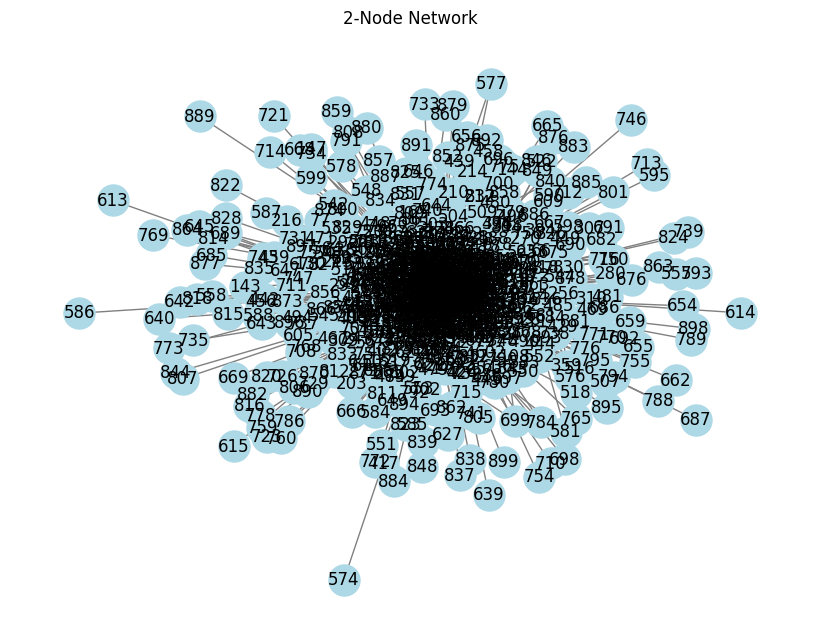

In [10]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Reading and Preparing the Data
url = 'https://raw.githubusercontent.com/yinaS1234/data-620/main/fbp2.csv'
data = pd.read_csv(url)
network_data = data.to_dict(orient='records')

# Plotting the 2-Node Network
plt.figure(figsize=(8, 6))
twonode_graph = nx.from_pandas_edgelist(data, 'user', 'topic', 'weight', create_using=nx.Graph())
pos = nx.spring_layout(twonode_graph)
nx.draw(twonode_graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500)
plt.title('2-Node Network')
plt.show()

# Reduce the network size using Island Method

In [11]:
# Step 2: Reducing the Size of the Network using the Island Method

# Create empty graphs for users and topics
user_graph = nx.Graph()
topic_graph = nx.Graph()

# Iterate over network data
for entry in network_data:
    user = entry['user']
    topic = entry['topic']
    weight = entry['weight']

    # Add edges to the user and topic graphs with the given weight
    user_graph.add_edge(user, topic, weight=weight)
    topic_graph.add_edge(user, topic, weight=weight)

# Set the threshold for edge filtering
threshold = 5

# Filter edges based on the threshold for users and topics
user_filtered_edges = [(u, v, w['weight']) for u, v, w in user_graph.edges(data=True) if w['weight'] >= threshold]
topic_filtered_edges = [(u, v, w['weight']) for u, v, w in topic_graph.edges(data=True) if w['weight'] >= threshold]

# Create new graphs for users and topics using the filtered edges
user_island_graph = nx.Graph()
user_island_graph.add_weighted_edges_from(user_filtered_edges)

topic_island_graph = nx.Graph()
topic_island_graph.add_weighted_edges_from(topic_filtered_edges)


# Inference about each of the distinct groups

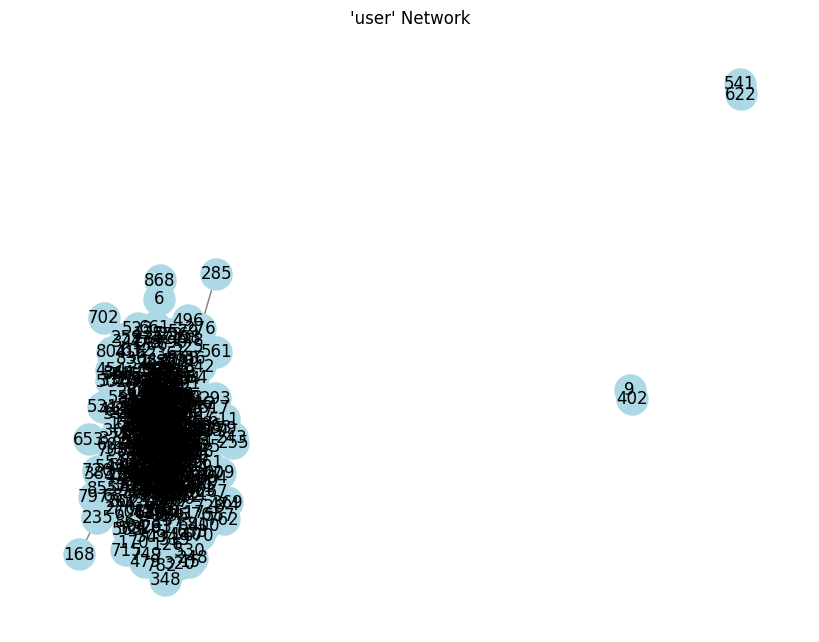

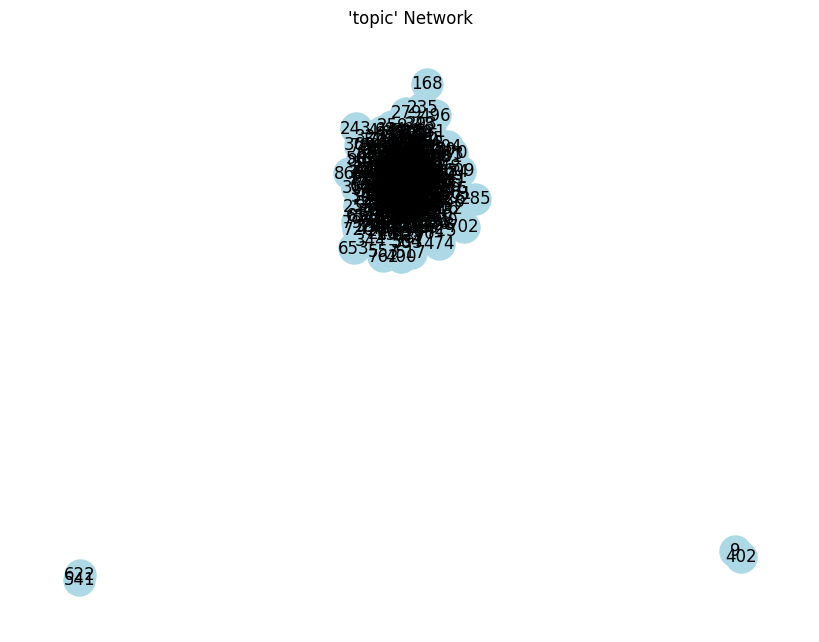

Number of distinct user groups: 3
User Group 1: {1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 109, 110, 112, 113, 114, 115, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 131, 132, 133, 134, 135, 137, 138, 139, 140, 141, 142, 145, 146, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 163, 164, 166, 167, 168, 169, 170, 172, 173, 174, 175, 176, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 189, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 204, 205, 206, 207, 208, 209, 211, 215, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235,

In [12]:
# Step 3: Inferring about Each Distinct Group
user_groups = list(nx.connected_components(user_island_graph))
topic_groups = list(nx.connected_components(topic_island_graph))

# Plotting the 'user' Network
plt.figure(figsize=(8, 6))
pos_user = nx.spring_layout(user_island_graph)
nx.draw(user_island_graph, pos_user, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500)
plt.title("'user' Network")
plt.show()

# Plotting the 'topic' Network
plt.figure(figsize=(8, 6))
pos_topic = nx.spring_layout(topic_island_graph)
nx.draw(topic_island_graph, pos_topic, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500)
plt.title("'topic' Network")
plt.show()

print(f"Number of distinct user groups: {len(user_groups)}")
for i, group in enumerate(user_groups):
    print(f"User Group {i+1}: {group}")

print(f"\nNumber of distinct topic groups: {len(topic_groups)}")
for i, group in enumerate(topic_groups):
    print(f"Topic Group {i+1}: {group}")


User Group 1: This group consists of a large number of users, indicated by the list of IDs provided. These users are likely the most active and engaged users within the online community. They participate in a wide range of topics and are interested in diverse areas of discussion.

User Group 2: This group contains only two users, identified by their IDs. Compared to the first group, this group is relatively small and may represent a specialized or niche subset of users. The limited number of users suggests that they may have unique preferences or interests that distinguish them from the larger user base.

User Group 3: This group comprises two users, distinct from the other groups. Like User Group 2, this group is also small in size, indicating a specialized subset of users. The commonality between the two users in this group might suggest a specific topic or interest that is of particular importance or relevance to them.

Topic Group 1: This group corresponds to the most prevalent and widespread topics discussed within the online community. The large number of topics indicates a diverse range of interests among the users. These topics likely cover a broad spectrum of subjects, attracting a significant portion of the user base.

Topic Group 2: This group includes 2 topics, which suggests a relatively niche or specific subject of discussion. The limited presence of this topic may indicate that it appeals to a smaller subset of users or represents a specialized area of interest within the community.

Topic Group 3: This group consists 2 topics, shared by a distinct set of users. This topic is likely unique and may be of particular significance to the users in User Group 3. The presence of a separate topic group with a limited number of users suggests a specific focus or interest that sets it apart from the other topics.

# Conclsusion

In summary, the analysis reveals the presence of three distinct user groups and three distinct topic groups within the online community. The larger user group and more prevalent topics represent the broad interests of the majority, while the smaller groups and specialized topics cater to niche preferences or specific areas of focus.